# Different Regresion Model Impact For Boston Housing Price Prediction
Using linear model project to predict the median housing price in Boston. The data is collected from kaggle. We will try using some simple model and visualization to understand what happening in each stage and goes deeper and higher model to analyze the data.

Import the library needed and the data

In [1]:
import numpy as np
import pandas as pd
import sklearn
import sys

In [2]:
df = pd.read_csv('/content/housing.csv', delim_whitespace=True, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


There is no header so we created one and put into the data

In [3]:
df.columns = ['CRIM', 'ZN' , 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


## EDA
One of the common method to explore the data is using pandas describe. The function will return the statistic of the data. In this model, we want to compare mean and 50% or median. After that we will look into mean and std.

*   Comparing mean and median to know if there are some noise or outlier in the data. Median is robust to outlier but mean can be affected. If the different between median and mean is big. That means there is outlier in the data.
*   Comparing mean and std to know if the data is noisy or not. If the std is very small than the mean, we can say that the data is not noisy as the data is located near the mean.



In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677082,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Now lets see the graph of each parameter correlated to each other

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


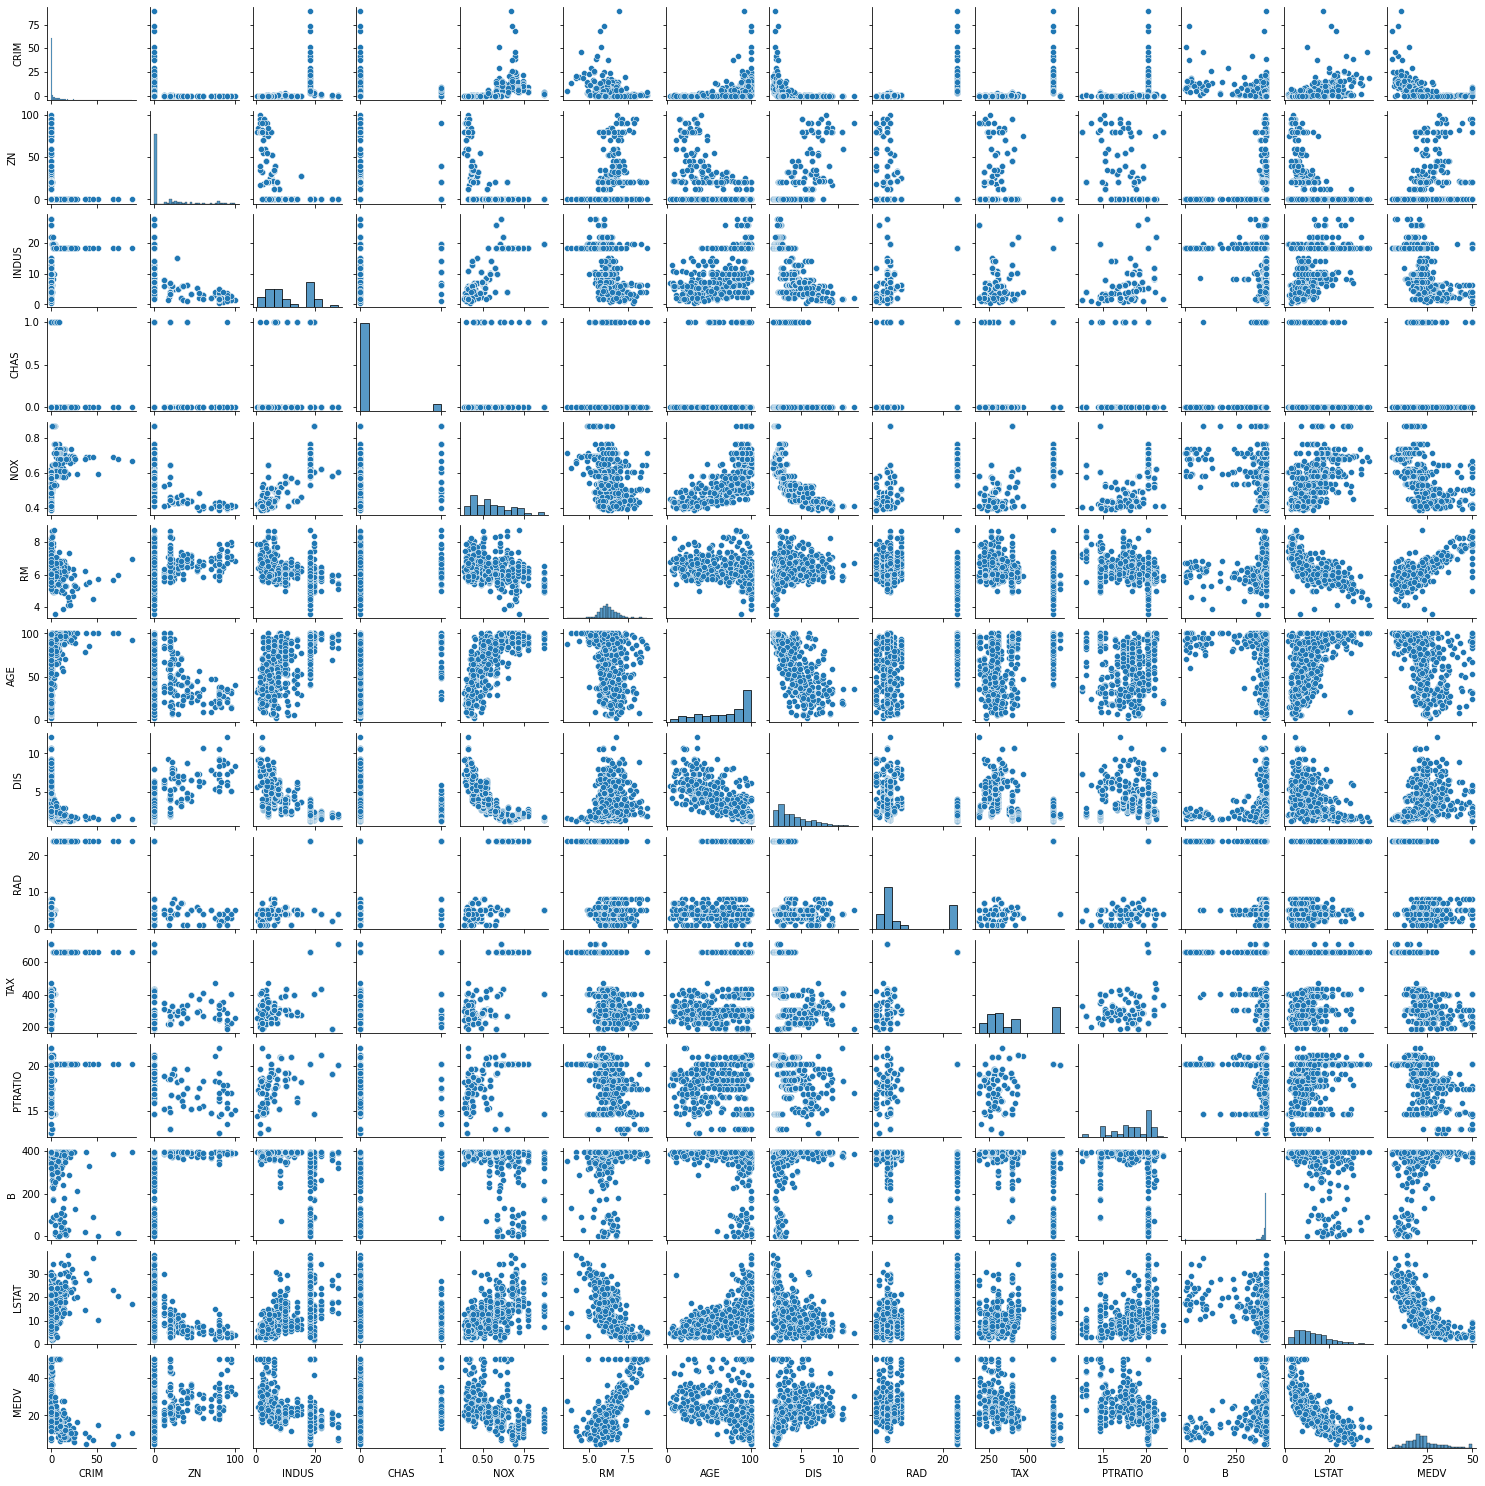

In [7]:
sns.pairplot(df, size = 1.5);
plt.show()

In [8]:
col_study = ['CRIM', 'RM', 'ZN', 'INDUS']

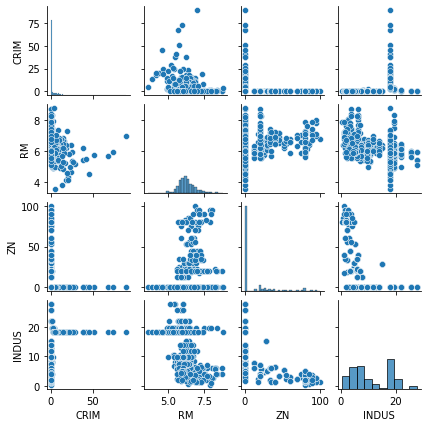

In [9]:
sns.pairplot(df[col_study], height = 1.5);
plt.show()

## Correlation


Before we look into correlation, if we look at the describe data. Pandas return float number till 5 digit. The data is longer and harder to read and sometime less number is more easily to read. So we will change the format to use 2 number only

In [10]:
pd.options.display.float_format = '{:,.2f}'.format

Using pandas function corr we can look at correlation between each parameter

In [11]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


As the number of parameter increasing, its harder to analyze the data only using number. In the next part, we will using some visualization and colour so its easier to anaylyze the correlation of each parameter.

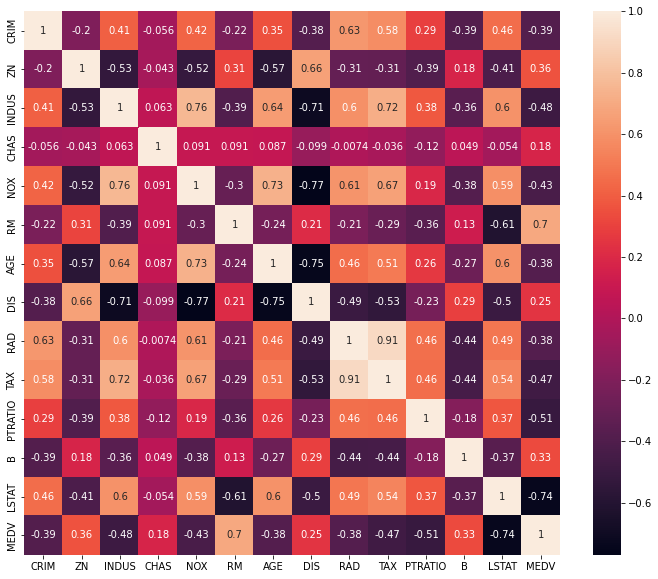

In [12]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot = True)
plt.show()

## Scikit Learn Regression
Before we jump into modeling all of the data, we will use some simple linear regression model to explain the linear regression model in scikit learn.
The independent variable will be RM and the dependent variable will be MEDV.

In [13]:
X = df['RM'].values.reshape(-1,1)

In [14]:
y = df['MEDV'].values

Import Linear Regression model from sklearn linear_model

In [15]:
from sklearn.linear_model import LinearRegression

We make the model and then we fit the data

In [16]:
model = LinearRegression()

In [17]:
model.fit(X,y)

LinearRegression()

We can see the coefficient and intercept of the model using coef_ and intercept_

In [18]:
model.coef_

array([9.10210898])

In [19]:
model.intercept_

-34.67062077643857

Using code or number is harder so lets use some visualization

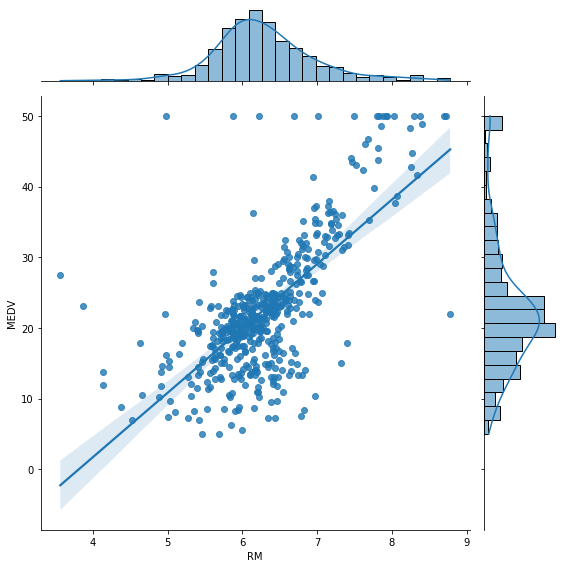

In [20]:
sns.jointplot(x='RM', y='MEDV', data = df, kind = 'reg', height = 8)
plt.show()

So the y value when x 0 is -35.67 and as x increase by 1 value, the y value will increase by 9.1 value. The RM data is close to normaly distributed but the MEDV data is slightly left skewed.
Our target is to make the value of each data can be explained by the line. In the model above we can see that some data actualy cant be represent by the line. So our job is to transform the data and the model that each value in the data can be explained by the line that created from the model.
### Ransac Regression
Now lets try ransac regressio. Unlike linear regression, ransac will filter the data and remove outlier.

In [21]:
from sklearn.linear_model import RANSACRegressor

In [22]:
model_2 = RANSACRegressor()

In [23]:
model_2.fit(X,y)

RANSACRegressor()

In [24]:
inlier_mask = model_2.inlier_mask_

We plot the model

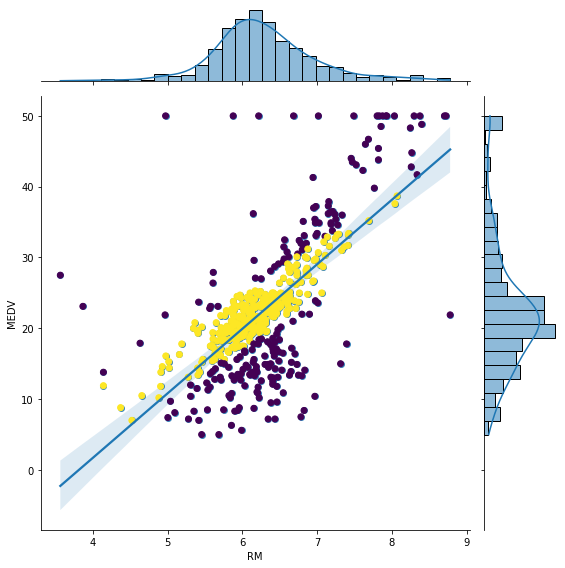

In [25]:
g = sns.jointplot(x='RM', y='MEDV', data = df, height = 8, kind = 'reg')
g.ax_joint.scatter(x='RM', y='MEDV', data = df, c=inlier_mask)
plt.show()

The model detect outlier, but when you see the visualization you get lots of data detected as outlier and removed from the modeling. From visualization above, we get that using ransac and normal regression will get different result. The line created from linear regression isnt same as the model that the ransac identified as inlier mask. So we need to be careful when choosing linear regression and transform outlier by ourself or the using ransac and let the model do it for us.

## Performance Evaluate Type

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop(columns='MEDV')

In [28]:
y = df['MEDV']

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [30]:
lr = LinearRegression()

In [31]:
lr.fit(X_train, y_train)

LinearRegression()

In [32]:
yhat = lr.predict(X_test)

### Residual Method
We will plot residual of the model. Residual is the different between the predicted value with real value. The smaller the residuals are the better the model.*italicized text*

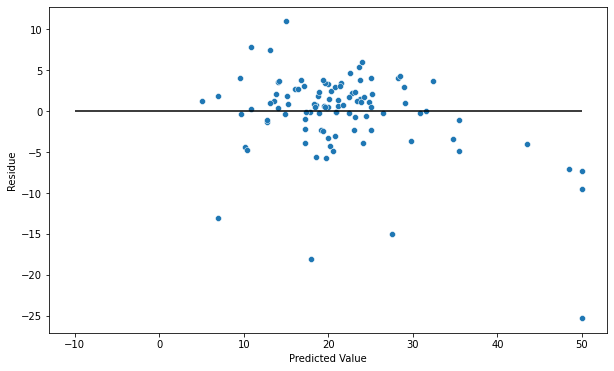

In [33]:
plt.figure(figsize=(10,6))
sns.scatterplot(x= y_test, y = yhat-y_test)
plt.hlines(y=0, xmin = -10, xmax = 50)
plt.xlabel('Predicted Value')
plt.ylabel('Residue')
plt.show()

From the model above we can see that lots of residual has big value so we can try next time to improve the model to get smaller residual value.
### MSE (Mean Squared Error) Method 

Its what the name meaning. The error or different between the real value and predicted value is squared. Sum all of that and divide by the number of the data. The smallest value the better the model is.

In [34]:
from sklearn.metrics import mean_squared_error

In [35]:
mean_squared_error(y_test, yhat)

24.291119474973545

### R2 Score Method
This is the method that the higher value we get the better the model is. the min value is 0 and the max value is 1.

In [36]:
from sklearn.metrics import r2_score

In [37]:
r2_score(y_test,yhat)

0.6687594935356316

## Regression
Now lets use some ordinary least square model and interpret the result from this model.

In [38]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [39]:
X_constant = sm.add_constant(X)

In [40]:
model = sm.OLS(y,X_constant)

In [41]:
lr = model.fit()

In [42]:
lr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Tue, 04 Jan 2022   Prob (F-statistic):          6.72e-135
Time:                        12:23:33   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
ZN             0.0464      0.014      3.382      0.001       0.019       0.073
INDUS          0.0206      0.061      0.334      0.738      -0.100       0.141
CHAS           2.6867      0.862      3.118      0.002       0.994       4.380
NOX          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
RM             3.8099      0.418      9.116      0.000       2.989       4.631
AGE            0.0007      0.013      0.052      0.958      -0.025       0.027
DIS           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
RAD            0.3060      0.066      4.613      0.000       0.176       0.436
TAX           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
PTRATIO       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
B              0.0093      0.003      3.467      0.001       0.004       0.015
LSTAT         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The R-squared is 0.74. The model is okay but not good enough. In this model we want to see the coef and P-value result. What we want to look are the coef of the parameter that has value of P less than 0.005. It means that the value that has P value bigger than 0.005 or 5% is not significant enought.

Or you can see the 0.025 and 0.975 value. With 95% confident I can say that the true coef value is between 0.025 value and 0.975 value. Now look at the "INDUS" parameter and you can see the P value is bigger than 0.005. Its 0.738. And the result is with 95% confidence, the true value of "INDUS" coef is between -0.1 and 0.141. Note that the value of 0 can be a true value of that coef. 0 coef has no impact at all to the model. **So we can say that "INDUS" parameter has no significant impact to the model.**

### Correlation Analyze

And when you see at the "Cond. No." and the warning we can see that the value is big and there are strong multicollinearity or other numerical problems. Lets analyze and visualize the data.

We will use heatmap again, but in this stage we will filter the parameter that has less than 0.5 value.

In [43]:
corr_matrix = df.corr()

In [44]:
corr_matrix[np.abs(corr_matrix) < 0.5] = 0
corr_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.63,0.58,0.00,0.00,0.00,0.00
ZN,0.00,1.00,-0.53,0.00,-0.52,0.00,-0.57,0.66,0.00,0.00,0.00,0.00,0.00,0.00
INDUS,0.00,-0.53,1.00,0.00,0.76,0.00,0.64,-0.71,0.60,0.72,0.00,0.00,0.60,0.00
CHAS,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
NOX,0.00,-0.52,0.76,0.00,1.00,0.00,0.73,-0.77,0.61,0.67,0.00,0.00,0.59,0.00
RM,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,-0.61,0.70
AGE,0.00,-0.57,0.64,0.00,0.73,0.00,1.00,-0.75,0.00,0.51,0.00,0.00,0.60,0.00
DIS,0.00,0.66,-0.71,0.00,-0.77,0.00,-0.75,1.00,0.00,-0.53,0.00,0.00,0.00,0.00
RAD,0.63,0.00,0.60,0.00,0.61,0.00,0.00,0.00,1.00,0.91,0.00,0.00,0.00,0.00
TAX,0.58,0.00,0.72,0.00,0.67,0.00,0.51,-0.53,0.91,1.00,0.00,0.00,0.54,0.00


Lets visualize the corr matrix

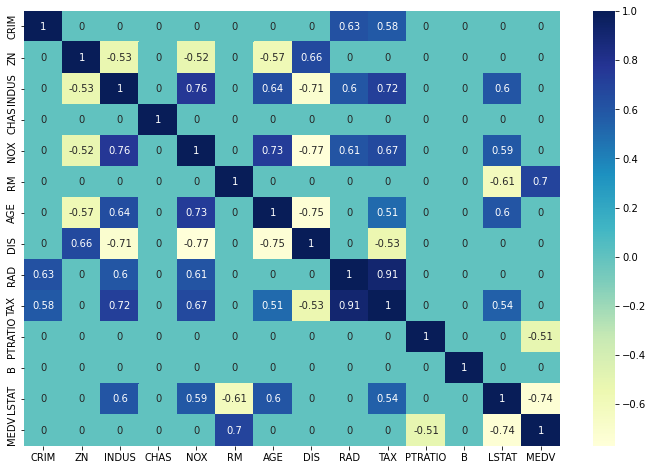

In [45]:
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot = True, cmap = 'YlGnBu')
plt.show()

We can dig more about the data that has big correlation value. This is one of the factor that you or your team need to know and understand the data.

## Scale the Data
Its one of important feature to transform the data. Lets look again at the describe result

In [46]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


Lets compare the value of min and max between parameter. For example Tax has max value of 711 and Nox has max value of 0.87. It can change the model because Tax has big value and can create bias in the model. So we need to scale it so each parameter has the same weight. We will compare the coef of each parameter after using scaler.

In [47]:
model = LinearRegression()

In [48]:
model.fit(X,y)

LinearRegression()

In [49]:
result = pd.DataFrame(list(zip(model.coef_, df.columns)), columns = ['coefficient', 'name']).set_index('name')
np.abs(result).sort_values(by='coefficient', ascending = False)

,coefficient
name,
NOX,17.77
RM,3.81
CHAS,2.69
DIS,1.48
PTRATIO,0.95
LSTAT,0.52
RAD,0.31
CRIM,0.11
ZN,0.05


You can see that Nox has very big coef while Age, B, and Tax almost 0. Lets look at the coef of the scaled data.

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

In [51]:
scaler = StandardScaler()
model_2 = make_pipeline(scaler, model)

In [52]:
model_2.fit(X,y)
result_2 = pd.DataFrame(list(zip(model_2.steps[1][1].coef_, df.columns)), columns = ['coefficient', 'name']).set_index('name')
np.abs(result_2).sort_values(by='coefficient', ascending = False)

,coefficient
name,
LSTAT,3.74
DIS,3.10
RM,2.67
RAD,2.66
TAX,2.08
PTRATIO,2.06
NOX,2.06
ZN,1.08
CRIM,0.93


Now you can see that the coef is more standarize between each parameter. And its useful, i will show you comparison of R2_score of two model below. The model_1 using all parameter, but the model_2 will drop "AGE".

In [53]:
lr = LinearRegression()
model_1 = make_pipeline(scaler, lr)
model_1.fit(X_train,y_train)

yhat = model_1.predict(X_test)
r2_score(y_test,yhat)

0.668759493535632

In [54]:
X2 = df.drop(columns=['MEDV','AGE'])
X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size = 0.2, random_state = 42)

In [55]:
lr = LinearRegression()
model_1 = make_pipeline(scaler, lr)
model_1.fit(X_train2,y_train)

yhat = model_1.predict(X_test2)
r2_score(y_test,yhat)

0.6702228274016815

In this model we delete another column and got higher score. But the important thing is we can get similar result by droping some column. If you have big data, droping one or two column can has different result in running time. 

## Regulerized Regression
In this stage we will try to use regulerization in regression. We will use different type of regression and comparing them. And we will use some example model to explain and visualize why sometime we want to use regulerized regression.



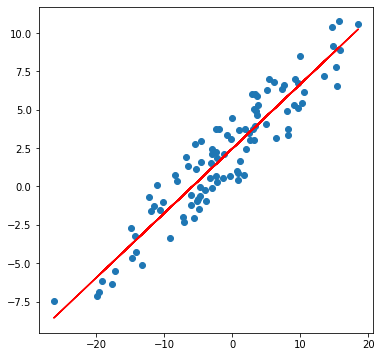

In [187]:
np.random.seed(42)
n_samples = 100
rng = np.random.randn(n_samples) * 10
y_rng = 0.4 * rng + 5  * np.random.rand(n_samples)

lr_exam = LinearRegression()
lr_exam.fit(rng.reshape(-1,1),y_rng)
yhat = lr_exam.predict(rng.reshape(-1,1))

plt.figure(figsize=(6,6))
plt.scatter(rng,y_rng)
plt.plot(rng,yhat,c='red')
plt.show()

In example above, when the data is in good shape the model will create good prediction, but we know that real data will be very noisy. So what happen when there's outlier in the data? this is the example what happen in linear regression model.

In [188]:
idx = rng.argmax()
y_rng[idx] = 500


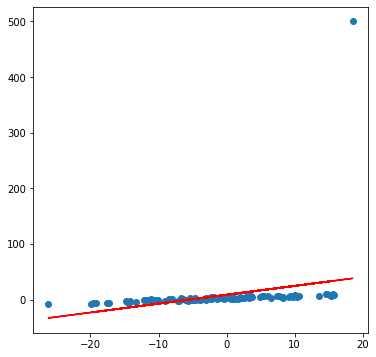

In [189]:
lr_exam = LinearRegression()
lr_exam.fit(rng.reshape(-1,1),y_rng)
lr_yhat = lr_exam.predict(rng.reshape(-1,1))

plt.figure(figsize=(6,6))
plt.scatter(rng,y_rng)
plt.plot(rng,lr_yhat,c='red')
plt.show()

In example above, we can see that the outlier can impact our model in linear regression. Thats why we need some regulerized regression that can ignored the outlier.

In [190]:
print(lr_exam.coef_)

[1.59311781]


### Ridge Regression
The first method is ridge regression

In [191]:
from sklearn.linear_model import Ridge

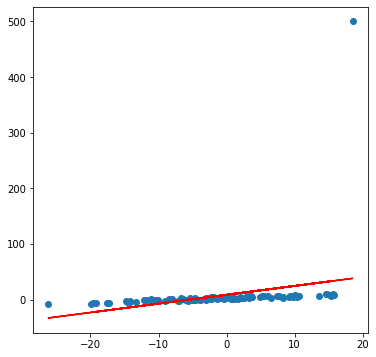

In [192]:
rr_exam = Ridge(alpha = 0.8)
rr_exam.fit(rng.reshape(-1,1),y_rng)
rr_yhat = rr_exam.predict(rng.reshape(-1,1))

plt.figure(figsize=(6,6))
plt.scatter(rng,y_rng)
plt.plot(rng,rr_yhat,c='red')
plt.show()

In [193]:
print(rr_exam.coef_)

[1.59296173]


In [194]:
rr = Ridge(alpha = 0.8)
model = make_pipeline(scaler,rr)
model.fit(X_train2, y_train)
yhat = model.predict(X_test2)
print("R2_Score:",r2_score(y_test, yhat))
print("MSE:",mean_squared_error(y_test, yhat))

R2_Score: 0.6699673256521528
MSE: 24.202544576446513


The R2_score is similar with linear regression for this data. Now lets try the second method LASSO.

### Lasso

In [195]:
from sklearn.linear_model import Lasso

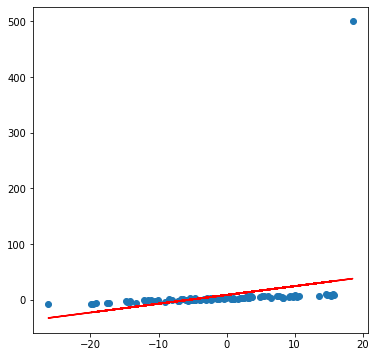

In [196]:
ll_exam = Lasso()
ll_exam.fit(rng.reshape(-1,1),y_rng)
ll_yhat = ll_exam.predict(rng.reshape(-1,1))

plt.figure(figsize=(6,6))
plt.scatter(rng,y_rng)
plt.plot(rng,ll_yhat,c='red')
plt.show()

In [203]:
print(ll_exam.coef_)

[1.58087074]


In [198]:
ls = Ridge(alpha = 0.3)
model = make_pipeline(scaler,ls)
model.fit(X_train2, y_train)
yhat = model.predict(X_test2)
print("R2_Score:",r2_score(y_test, yhat))
print("MSE:",mean_squared_error(y_test, yhat))

R2_Score: 0.6701271464730518
MSE: 24.190824311022194


The lasso has the same result as ridge. Now lets try using the third method, elastic net. Elastic net is the method that combine ridge and lasso.

### Elastic Net

In [199]:
from sklearn.linear_model import ElasticNet

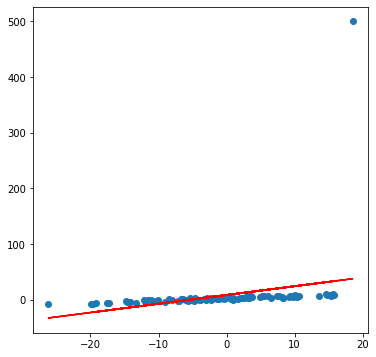

In [200]:
en_exam = ElasticNet()
en_exam.fit(rng.reshape(-1,1),y_rng)
en_yhat = en_exam.predict(rng.reshape(-1,1))

plt.figure(figsize=(6,6))
plt.scatter(rng,y_rng)
plt.plot(rng,en_yhat,c='red')
plt.show()

In [202]:
print(en_exam.coef_)

[1.57733541]


In [214]:
en = ElasticNet(alpha = 0.3)
model = make_pipeline(scaler,en)
model.fit(X_train2, y_train)
yhat = model.predict(X_test2)
print("R2_Score:",r2_score(y_test, yhat))
print("MSE:",mean_squared_error(y_test, yhat))

R2_Score: 0.6386189617259117
MSE: 26.501438699044368


For the example data, you can see that the coefficient of the regulerized regression is smaller than linear regression as the outlier is being regulerized. The number maybe small because the size of the example data. Still it has impact for the data that has outlier. But not all data perform better using regulired regression as the boston housing data has better result in MSE using normal linear regression.

## Polynomial Regression
Now we will check using polynomial regression

We will start using example data now

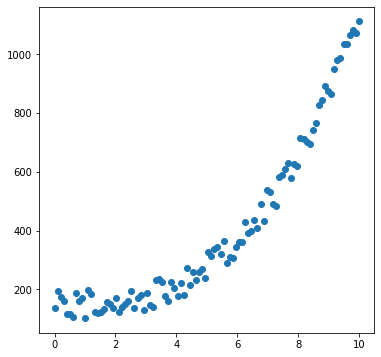

In [205]:
np.random.seed(42)
n_samples = 100
x_example = np.linspace(0,10,100)
rng = np.random.rand(n_samples) * 100
y_example = x_example ** 3 + rng + 100

plt.figure(figsize=(6,6))
plt.scatter(x_example,y_example)
plt.show()

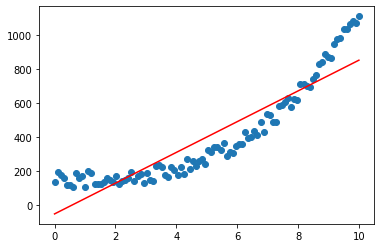

In [207]:
lr = LinearRegression()
lr.fit(x_example.reshape(-1,1),y_example)
lr_yhat = lr.predict(x_example.reshape(-1,1))

plt.scatter(x_example,y_example)
plt.plot(x_example,lr_yhat, c='red')
plt.show()

In the example above we can see that using linear regression model for polynomial data create bad result. So we need another model that can create better result for this kind of data.

In [208]:
from sklearn.preprocessing import PolynomialFeatures
pf = PolynomialFeatures(degree = 3)
x_poly = pf.fit_transform(x_example.reshape(-1,1))

In [209]:
lr_2 = LinearRegression()
lr_2.fit(x_poly,y_example)
lr_2_yhat = lr_2.predict(x_poly)

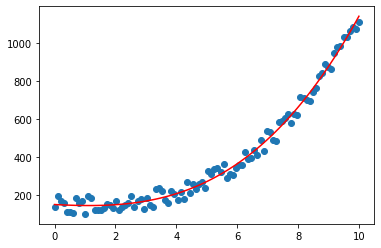

In [210]:
plt.scatter(x_example,y_example)
plt.plot(x_example,lr_2_yhat, c='red')
plt.show()

Now, the model create better shape that follow the data and the result is better than using linear regression. But in this model we know the degree of the data because we created it, in real life data we dont know which degree the data is so we need to analyze it.

### Boston Housing Using Polynomial Regression

In [223]:
pf = PolynomialFeatures(degree = 2)
X_poly = pf.fit_transform(X_train2)
X_poly_test = pf.fit_transform(X_test2)

model = make_pipeline(scaler,lr)
model.fit(X_poly, y_train)
yhat = model.predict(X_poly_test)

print((y_train).shape,(yhat).shape)

(404,) (102,)


In [224]:
print("R2_Score:",r2_score(y_test, yhat))
print("MSE:",mean_squared_error(y_test, yhat))

R2_Score: 0.7922393977016566
MSE: 15.235870958204803


Using Polynomial Regression with degree 2 actually increase our model for boston housing data. The MSE value is decreasing from 26 to 15.

## Decision Tree Regression
What if our data isnt linear at all that our polynomial model can create good model too. In this case we can try using decision tree. Decision Tree has regression model that we can use for non linear data. Lets try it

In [225]:
  from sklearn.tree import DecisionTreeRegressor

In [255]:
dtr = DecisionTreeRegressor(max_depth = 5)

In [256]:
model = make_pipeline(scaler,dtr)
model.fit(X_train2, y_train)
yhat = model.predict(X_test2)

print("R2_Score:",r2_score(y_test, yhat))
print("MSE:",mean_squared_error(y_test, yhat))

R2_Score: 0.8918326203482135
MSE: 7.932323164404439


Using Decision Tree Regressor actually decreasing our MSE value again. If we compare 3 model decision tree has the best result with minimum value of MSE. If the model is big sometime its hard to choose the good max depth value. In this case we can use random forest regressor that can find the good parameter value.

In [266]:
from sklearn.ensemble import RandomForestRegressor

In [267]:
rfr = RandomForestRegressor(n_estimators = 500, criterion = 'squared_error')

In [268]:
forest = make_pipeline(scaler,rfr)
forest.fit(X_train2, y_train)
yhat = model.predict(X_test2)

print("R2_Score:",r2_score(y_test, yhat))
print("MSE:",mean_squared_error(y_test, yhat))

R2_Score: 0.9192967082494578
MSE: 5.918277697558546


The result is better than our previous model. And we dont need to find the max_depth value. But we want to note that RandomForest actually need more time to process than the other model. So we need to think about that if our data is really big. Another model that we can try is ada boost regressor

In [262]:
from sklearn.ensemble import AdaBoostRegressor

In [277]:
ada = AdaBoostRegressor(DecisionTreeRegressor(max_depth = 5), n_estimators = 500)

In [281]:
model = make_pipeline(scaler,ada)
model.fit(X_train2, y_train)
yhat = model.predict(X_test2)

print("R2_Score:",r2_score(y_test, yhat))
print("MSE:",mean_squared_error(y_test, yhat))

R2_Score: 0.9204606995197295
MSE: 5.832917814143924


And with this model, we can analyze which column is important so maybe we can process our data again. Lets check it from Random Forest model

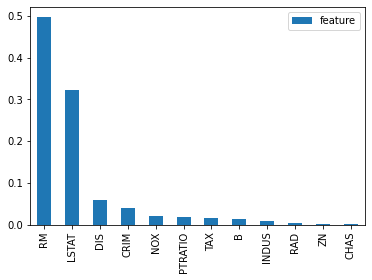

In [289]:
result = pd.DataFrame(forest.steps[1][1].feature_importances_, df.drop(columns=['MEDV','AGE']).columns)
result.columns = ['feature']
result.sort_values(by='feature', ascending = False).plot(kind='bar');